<h1 align='center' style="color: blue;">Text Analysis - Part II</h1>

In [39]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## 1. Term Frequency Visualization

We already have used wordcloud for presentation of word frequency in textual data. However, we also need to use a more scientific approach for our presentation. In this section, you will learn how to present token frequency using yellowbrick package

In [42]:
#!pip install yellowbrick

Let's use wikipedia API for data collection.

In [43]:
#!pip install wikipedia

In [44]:
import wikipedia
# Search for a keyword
wiki_obj = wikipedia.page("Barack Obama")
# Get the content of Wikipedia 
wiki_con = wiki_obj.content
wiki_con

'Barack Hussein Obama II ( (listen); born August 4, 1961) is an American politician and attorney who served as the 44th president of the United States from 2009 to 2017. A member of the Democratic Party, he was the first African-American president of the United States. He previously served as a U.S. senator from Illinois from 2005 to 2008 and an Illinois state senator from 1997 to 2004.\nObama was born in Honolulu, Hawaii. After graduating from Columbia University in 1983, he worked as a community organizer in Chicago. In 1988, he enrolled in Harvard Law School, where he was the first black person to head the Harvard Law Review. After graduating, he became a civil rights attorney and an academic, teaching constitutional law at the University of Chicago Law School from 1992 to 2004. Turning to elective politics, he represented the 13th district from 1997 until 2004 in the Illinois Senate, when he ran for the U.S. Senate. Obama received national attention in 2004 with his March Senate-pr

<b>Note</b>: You can also use the <b style="color:red">url</b> to get the link for the wikipedia page. 

In [45]:
wiki_obj.url

'https://en.wikipedia.org/wiki/Barack_Obama'

In [46]:
#try:
    #p = wikipedia.page("Barack Obama")
#except wikipedia.DisambiguationError as e:
   # s = random.choice(e.options)
    #p = wikipedia.page(s)

<b>Example:</b> Collect wikipedia info for more than one person.

In [54]:
names = ['Barack Obama', 'Michele Obama', 'George H. W. Bush', 'Laura Bush']

contents = [wikipedia.page(name).content for name in names]

#contents = []
#for name in names:
    #content = wikipedia.page(name).content
    #contents.append(content)

df = pd.DataFrame({'name':names, 'content':contents})
df

,name,content
0,Barack Obama,Barack Hussein Obama II ( (listen); born Augus...
1,Michele Obama,Michelle LaVaughn Robinson Obama (née Robinson...
2,George H. W. Bush,"George Herbert Walker Bush (June 12, 1924 – No..."
3,Laura Bush,Laura Welch Bush (née Laura Lane Welch; born N...


Now, let's visualize the content.

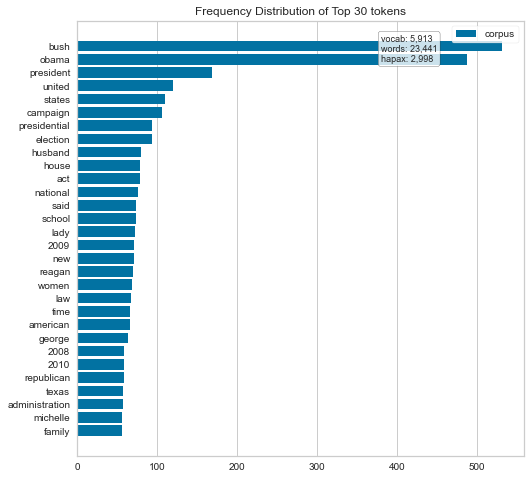

In [55]:
from yellowbrick.text.freqdist import FreqDistVisualizer 
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


# Find the Document Term Frequency Matrix 
vect = CountVectorizer(stop_words='english')
X = vect.fit_transform(df.content)

# Get all features (tokens)
features = vect.get_feature_names()

# Use yellowbrick package for visualization of top 30 tokens
fig, ax = plt.subplots(figsize=(8, 8))
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(X)
visualizer.poof()

## 2. Topic Modeling and Document Clustering

Topic modeling is one of the popular techniques in text analysis. This task is similar to the process of clustering in numerical data analysis. Often, when people talk about topic modeling, they refer to one particular decomposition method called <b>Latent Dirichlet Allocation (LDA)</b>

In LDA, each document may be viewed as a mixture of various topics where each document is considered to have a set of topics that are assigned to it via LDA. This is identical to probabilistic latent semantic analysis (pLSA), except that in LDA the topic distribution is assumed to have a sparse Dirichlet prior. The sparse Dirichlet priors encode the intuition that documents cover only a small set of topics and that topics use only a small set of words frequently. In practice, this results in a better disambiguation of words and a more precise assignment of documents to topics. LDA is a generalization of the pLSA model, which is equivalent to LDA under a uniform Dirichlet prior distribution. (<b>Source:Wikipedia</b>)

Let's use wine-reviews dataset again.

In [62]:
from sklearn.feature_extraction.text import CountVectorizer 

df = pd.read_csv("wine-reviews/winemag-data-130k-v2.csv",index_col=0, nrows=20000)

df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


<b>Note:</b> Topic mining process can take large amount of time. In order to make the process faster, you can use the following attributes in CountVectorizer to reduce the sime of Document Term Frequency Matrix:
<ul>
    <li><b>max_features:</b> Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus</li>
    <li><b>max_df:</b> When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold.</li>

In [63]:
# Let's create the Document Term Frequency Matrix
vect = CountVectorizer(max_features=10000, max_df=.60, 
                       stop_words="english")
X = vect.fit_transform(df.description)

In [64]:
X.shape

(20000, 10000)

<b>Note:</b> You can use <b style="color:blue">LatentDirichletAllocation( )</b> function for LDA topic mining.

In [65]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, learning_method="batch",
                                max_iter=25, random_state=0) 

document_topics = lda.fit_transform(X)

<b>Note:</b> document_topics variable shows the probability that each document belongs to one of the captured topics. The shape of document_topics is (n_documents, n_topic)

In [66]:
document_topics.shape

(20000, 5)

In [67]:
document_topics

array([[0.00960552, 0.00962336, 0.34829007, 0.00965884, 0.62282222],
       [0.95748258, 0.01060096, 0.01058114, 0.01064486, 0.01069046],
       [0.01075513, 0.16080867, 0.80725462, 0.01062452, 0.01055707],
       ...,
       [0.00739415, 0.00725448, 0.43273021, 0.54539155, 0.00722961],
       [0.00773073, 0.53803005, 0.00793341, 0.43843813, 0.00786768],
       [0.75352772, 0.13101466, 0.00723084, 0.00732416, 0.10090262]])

<b>Note:</b> You can use <b style="color:red">components_</b> attribute to get weights of each token in different captured topics. The output of components_ attribute is a numpy array with a shape of (n_topics, n_tokens).

In [68]:
# let's see the result
lda.components_

array([[ 1.94057797,  0.2001783 ,  0.20137167, ..., 16.19982918,
         0.20133575,  0.2000053 ],
       [ 0.20286062,  0.20000137,  0.20116853, ...,  0.20001988,
         0.20622224,  3.13548115],
       [ 0.20229334,  0.20097227,  0.20141371, ...,  0.20000079,
         0.20431686,  0.21027389],
       [45.45365835,  3.19825621,  2.19604368, ...,  0.20009876,
         1.18812128,  0.2000045 ],
       [ 0.20060972,  0.20059184,  0.2000024 , ...,  0.20005138,
         0.20000388,  2.25423516]])

In [11]:
lda.components_.shape

(5, 10000)

Let's see the terms(tokens) with highest weight in each topic

In [12]:
# Set n to your desired number of tokens 
n = 8

# Get features (tokens) from CountVectorizer
feature_names = np.array(vect.get_feature_names())

# Find top n tokens
topics = dict()
for idx, component in enumerate(lda.components_): 
    top_n_indices = component.argsort()[:-(n + 1): -1] 
    topic_tokens = [feature_names[i] for i in top_n_indices] 
    topics[idx] = topic_tokens

topics

{0: ['wine', 'drink', 'acidity', 'ripe', 'fruit', 'fruits', 'tannins', 'rich'],
 1: ['fruit',
  'wine',
  'flavors',
  'cabernet',
  'black',
  'cherry',
  'blend',
  'palate'],
 2: ['flavors',
  'finish',
  'palate',
  'aromas',
  'fruit',
  'acidity',
  'apple',
  'wine'],
 3: ['flavors',
  'wine',
  'cherry',
  'oak',
  'blackberry',
  'fruit',
  'black',
  'rich'],
 4: ['palate',
  'aromas',
  'cherry',
  'tannins',
  'black',
  'offers',
  'spice',
  'red']}

We can also check and see the documents with high probability assigned to each topic

In [13]:
topic_0 = np.argsort(document_topics[:, 0])[::-1]
# print the five documents where the topic is most important 
for index in topic_0[:5]:
    # pshow first two sentences
    print(df.description[index],"\n------------\n")

This is an impressive, powerful wine. It speaks of the hard landscape of the Douro Superior, with its structure and dark tannins. At the same time, ripe dark fruits push through the still-young tannins giving the potential for a rich, black fruit dominated wine. Predominantly Touriga Nacional (60 percent), this wine is a new venture created by João Nicolau d'Almeida (who has run Ramos-Pinto for many years) and his family. Drink from 2018. 
------------

Dense, concentrated and firm, this wine has a powerful, rich structure that promises well. Big berry fruits and dark tannins are developing well together. The wine is full of promise so drink from 2020. Fifteen-percent of the 74 acres of vines are more than 120 years old. New York banker Robert G. Wilmers bought Haut-Bailly in 1998 from the Sanders family, owners since 1955. Véronique Sanders-van Beek has run the estate since then. 
------------

In the increasingly important Dão region, Sobral's top-of-the-range is an impressively rich

<b>Note:</b> It is useful to see which topic is more representative in our dataset. In order to do that you can find the some of the proababilities of documents in each topic.

In [14]:
# Let's increase the number of topics to 20 
n_topics = 20
lda = LatentDirichletAllocation(n_components=n_topics, learning_method="batch",
                                max_iter=25, random_state=0) 
document_topics = lda.fit_transform(X)

# Sort the tokens and get top 2 tokens in each topic
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
topic_names = ["{:>2} ".format(i) + " ".join(words) 
               for i, words in enumerate(feature_names[sorting[:, :2]])] 

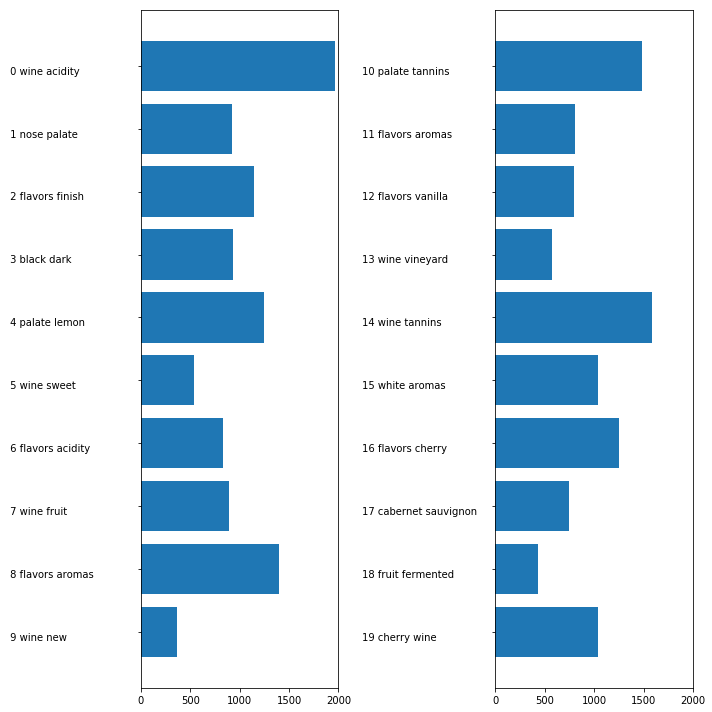

In [15]:
# Let's visualize the result
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
# two column bar chart:
for col in [0, 1]: 
    start = col*int(n_topics/2)
    end=(col+1)*int(n_topics/2)
    ax[col].barh(np.arange(int(n_topics/2)), np.sum(document_topics, axis=0)[start:end]) 
    ax[col].set_yticks(np.arange(int(n_topics/2))) 
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top") 
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
    plt.tight_layout()

## 3. Regular Expression

Regular Expression allows us to extract desired pattern from text. In order to use Regular Expression syntax you need to become familiar with some symbols.

<ul>
    <li><b style="color:red">. </b>: Wildcard, matches a single character</li>
    <li><b style="color:red">^ </b>: Indicates start of a string</li>
    <li><b style="color:red"><span>$</span> </b>: Indicates end of a string</li>
    <li><b style="color:red">[ ]</b>: Matches one of the set of characters within [ ]</li>
        <ul>
            <li>[a-z]: Matches one of the characters of a,b,c,...,z</li>
            <li>[^abc]: Matches a character that is not a, b, or c</li>
        </ul>
    <li><b style="color:red">a|b</b>: Matches either a or b, where a and b are string</li>
    <li><b style="color:red">\</b> : Escapes characters for special characters (\t,\n,\b) </li>
    <li><b style="color:red">\b</b> : Matches word boundary </li>
    <li><b style="color:red">\d</b> : Matches any digit, equivalent to [0-9]  </li>
    <li><b style="color:red">\D</b> : Matches any non-digit, equivalent to [^0-9]  </li>
    <li><b style="color:red">\s</b> : Matches any whitespace character, equivalent to [ \t\n\r\f\v]  </li>
    <li><b style="color:red">\S</b> : Matches any non-whitespace character, equivalent to [^ \t\n\r\f\v]  </li>
    <li><b style="color:red">\w</b> : Matches any alphanumeric character, equivalent to [a-zA-Z0-9_]  </li>
    <li><b style="color:red">\w</b> : Matches any non-alphanumeric character, equivalent to [^a-zA-Z0-9_]  </li>
    <li><b style="color:red">*</b> : Matches zero or more occurrences</li>
    <li><b style="color:red">+</b> : Matches one or more occurrences</li>
    <li><b style="color:red">?</b> : Matches zero or one occurrences</li>
    <li><b style="color:red">{n}</b> : Matches exactly n occurrences</li>
    <li><b style="color:red">{n,}</b> : Matches at least n occurrences</li>
    <li><b style="color:red">{,n}</b> : Matches at most n occurrences</li>
    <li><b style="color:red">{m,n}</b> : Matches at least m occurrences and at most n occurrences</li>
</ul>

In [16]:
import re

In [17]:
text = "Hey @MjuL let's have a quick talk with @jZZ. My email is abcd@gmail.com. #talk #regular #expression"

<b>Example:</b> Find words with # in the above sentence 

In [18]:
my_text_list = text.split(' ')
my_text_list

['Hey',
 '@MjuL',
 "let's",
 'have',
 'a',
 'quick',
 'talk',
 'with',
 '@jZZ.',
 'My',
 'email',
 'is',
 'abcd@gmail.com.',
 '#talk',
 '#regular',
 '#expression']

In [19]:
[word for word in my_text_list if re.search('#',word)]

['#talk', '#regular', '#expression']

<b>Note:</b> You can also use <b style="color:blue">findall( )</b> function to find your desired patterns.

In [20]:
re.findall(r'#\w+',text)

['#talk', '#regular', '#expression']

In [22]:
re.findall(r'\w{4}',text)

['MjuL',
 'have',
 'quic',
 'talk',
 'with',
 'emai',
 'abcd',
 'gmai',
 'talk',
 'regu',
 'expr',
 'essi']

<b>Example</b>: Find people how mentioned by @ in the above sentence.

In [23]:
re.findall(r'\B@\w+',text) #right format

['@MjuL', '@jZZ']

<b>Example</b>: Find email address @ in the above sentence.

In [24]:
re.findall(r'\w+@\w+.\w+',text)

['abcd@gmail.com']

In [27]:
re.findall(r'\w+@\w+.\w{3}',text)

['abcd@gmail.com']

<b>Example:</b> Let's apply what we have learnt on a Tweets_Brewery dataset. This dataset contains 6-month tweets of Brewery companies in twitter.

In [28]:
df = pd.read_csv("Tweets/Tweets_Brewery.csv",index_col=0)
df = df.dropna()
df.head()

,text,u_id
0,Have you tried BA mobile yet? http://t.co/QcrU...,15205798.0
1,For the latest BeerAdvocate updates: http://t....,15205798.0
2,"""MillerCoors Seeks Spirits Fans With Bourbon-L...",15205798.0
3,.@CambridgeBrewer Barleywine Fest is this Thur...,15205798.0
4,@roblutter @beernerds Ah. Theres 2 BB threads....,15205798.0


You can use Regular Expression to define patterns of tokens in CountVectorizer. Let's just use # based tokens for analysis.

In [29]:
vect =  CountVectorizer(token_pattern='#\w+')
X = vect.fit_transform(df.text)

Let's visualize the frequency.

NameError: name 'FreqDistVisualizer' is not defined

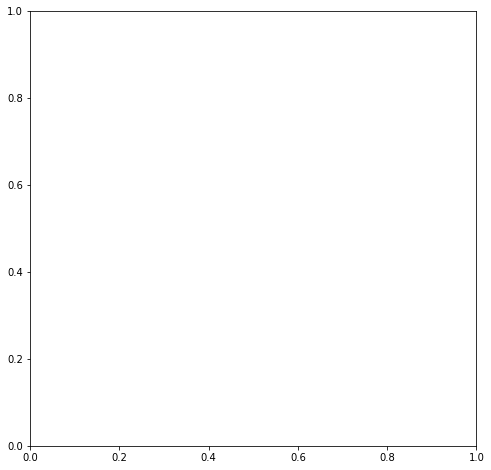

In [30]:
features = vect.get_feature_names()
fig, ax = plt.subplots(figsize=(8, 8))
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(X)
visualizer.poof()

Let's apply topic mining model.

In [31]:
lda = LatentDirichletAllocation(n_components=5, learning_method="batch",
                                max_iter=25, random_state=0) 
document_topics = lda.fit_transform(X)

In [ ]:
n = 5
feature_names = np.array(vect.get_feature_names())
topics = dict()
for idx, component in enumerate(lda.components_): 
    top_n_indices = component.argsort()[:-(n + 1): -1] 
    topic_tokens = [feature_names[i] for i in top_n_indices] 
    topics[idx] = topic_tokens

topics

Let's find prominent topics

In [ ]:
n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics, learning_method="batch",
                                max_iter=25, random_state=0) 

document_topics = lda.fit_transform(X)
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
topic_names = ["{:>2} ".format(i) + " ".join(words) 
               for i, words in enumerate(feature_names[sorting[:, :2]])] 

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
# two column bar chart:
for col in [0, 1]: 
    start = col*int(n_topics/2)
    end=(col+1)*int(n_topics/2)
    ax[col].barh(np.arange(int(n_topics/2)), np.sum(document_topics, axis=0)[start:end]) 
    ax[col].set_yticks(np.arange(int(n_topics/2))) 
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top") 
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 7000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
    plt.tight_layout()

<b>Exercise:</b> Can you extract the links from Tweets using Regular Expression.

<b>Extra Credit Activity:</b> Is there any approach to find the best number of topic with LDA? If yes show that with one example.